# Analytical Diffusion-Synchrotron Model

In [15]:
# import some libaries for python
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit


E = 10  # in GeV
D = 0.8 # arbitrary constant
A = 1.  # arbitrary constant
alpha = 2. #  spectral index of electron injection

# 1. Time comparison synchrotron cooling -- diffusion

## 1.1 Characteristic synchrotron cooling

The characteristic synchrotron cooling time is given as 

\begin{align}
\tau_\mathrm{syn} = \frac{E}{P} \approx 4\cdot 10^5 \left(\frac{E}{\mathrm{GeV}}\right)^{-1}\left(\frac{B}{\mathrm{G}}\right)^{-2}\mathrm{s}.
\end{align}

## 1.2 Characteristic diffusion time

The characteristic diffusion time is given as

\begin{align}
\tau_\mathrm{diff} = \frac{\lambda}{c} = 3\frac{\kappa}{c^2}
\end{align}

with the diffusion coefficient $\kappa$ for Bohm diffusion:

\begin{align}
\kappa = \frac{E}{6qbc}.
\end{align}

The characteristic diffusion time finally yields 
\begin{align}
\tau_\mathrm{diff} = \frac{E}{2qBc^2} \approx 5.6\cdot 10^{-5} \left(\frac{E}{\mathrm{GeV}}\right)\left(\frac{B}{\mathrm{G}}\right)^{-1} \mathrm{s}.
\end{align}

## 1.3 Dominating effect 

The field stregth strength $B$ can be caluculated for which both characteristic time scales coincide as a function of $E$:

\begin{align}
\tau_\mathrm{dif} = \tau_\mathrm{syn}\\
\rightarrow \left(\frac{B}{\mathrm{G}}\right) = \frac{4}{5.6}10^{10}\left(\frac{E}{\mathrm{GeV}}\right)^{-2}.
\end{align}

Therefore, the time for which both characterisitc time scales agree can be formulated as follows

\begin{align}
\tau_\mathrm{equal} = \frac{5.6^2}{4} 10^{-15}\left(\frac{E}{\mathrm{GeV}}\right)^3.
\end{align}

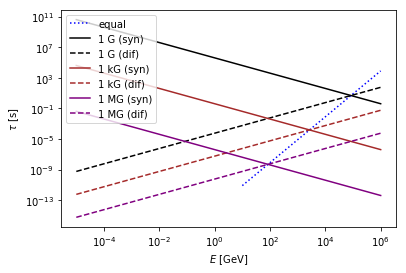

In [59]:
def func_tau_syn(E, B):
    return (4*10**5*E**(-1)*B**(-2))
def func_tau_dif(E, B):
    return (5.6*10**(-5)*E**(1)*B**(-1))
def func_tau_equal(E):
    return (5.6**2/4*10**(-15)*E**(3))

# Energy intervall of interest in GeV
E_range = np.linspace(10**(-5),10**6,100000)
B = 1.0 # in G
 
plt.plot(E_range[1:],func_tau_equal(E_range)[1:],c='b',ls=':',label='equal')

plt.plot(E_range,func_tau_syn(E_range, B),c='k',ls='-',label='1 G (syn)')
plt.plot(E_range,func_tau_dif(E_range, B),c='k',ls='--',label='1 G (dif)')
plt.plot(E_range,func_tau_syn(E_range, B*1000),c='brown',ls='-',label='1 kG (syn)')
plt.plot(E_range,func_tau_dif(E_range, B*1000),c='brown',ls='--',label='1 kG (dif)')
plt.plot(E_range,func_tau_syn(E_range, B*1000000),c='purple',ls='-',label='1 MG (syn)')
plt.plot(E_range,func_tau_dif(E_range, B*1000000),c='purple',ls='--',label='1 MG (dif)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\\tau$ [s]')
plt.xlabel('$E$ [GeV]')
plt.legend()
plt.show()

As demonstated above, for the realistic parameter space $E < $ TeV and $B < $ MG, diffusion dominates and synchrotron cooling can be neglected as an energy-loosing effect of the electrons.

# 2. Synchrotron radiation

Snchrotron emission of electrons at critical energy $E_\mathrm{e,c}$:

\begin{align}
E_\mathrm{e,c} = 40 \left(\frac{E}{\mathrm{GeV}}\right)^2 \left(\frac{B}{\mathrm{G}}\right) \mathrm{keV}.
\end{align}



The magnetic field around M-Dwarfs decreases with radius as

\begin{align}
B = B_0 r^{-\beta}.
\end{align}

# 3. Diffusion 

TODO: derive N(t)

The number of particles $N(t)$ that arrive at a radius $r$ for a given diffusion coefficient $\kappa$ is given as

\begin{align}
N(t) = \frac{A_1}{(\kappa t)^{3/2}}\exp{\left(-\frac{r^2}{4 \pi \kappa t}\right)}.
\end{align}

## 3.1 One electron energy $E_\mathrm{min}$

Due to the steep electron injection spectrum, only particles with the lowest energy $E_\mathrm{min}$ are considered. This minimum energy is defined as the value, which is sufficient to generate photons of minimum energy $E_c$ that are considered for the lightcurve. Since the magnetic field strength decreases with increasing radius, this emission takes place at the minimum radius $R_0$, where the magnetic field strength $B_\mathrm{max}$ is the highest:

\begin{align}
E_\mathrm{e,min} = \frac{1}{40^{1/2}}\left(\frac{E_\mathrm{\gamma,min}}{\mathrm{keV}}\right)^{1/2} \left(\frac{B_\mathrm{max}}{\mathrm{G}}\right)^{-1/2}  \mathrm{GeV}.
\end{align}

## 3.2 Electron energy spactrum $N(E_\mathrm{e}) \propto E_\mathrm{e}^{-\alpha}$ with $E_\mathrm{e,min} \leq E_\mathrm{e} \leq E_\mathrm{e,max}$

Even thought the emission of electrons with $E_\mathrm{e,min}$ will dominate due to the steep injection spectrum $N(E_\mathrm{e})$ and the steep radial decrease of the magnetic field strength, there are two further effects that have to be considered if an injection spectrum of electrons is taken into account. 

1. Higher electron energies require lower magnetic field strength in order to create photons with $E_\mathrm{\gamma,min}$. This lead to an emission at larger radii as derived in 1.2.1.

2. Electrons with higher energies can also emit photons at radius $R_0$ with higher photon energies. However, since $E_\mathrm{\gamma,min}$ is constrained by the observation, only energies up to 
\begin{align}
E_\mathrm{e,max} = \frac{1}{40^{1/2}}\left(\frac{E_\mathrm{\gamma,max}}{\mathrm{keV}}\right)^{1/2} \left(\frac{B_\mathrm{max}}{\mathrm{G}}\right)^{-1/2}  \mathrm{GeV}
\end{align}
are considered as presented in 1.2.2.

These two effects, however, influence the photon emission simultaneously, rather than isolated as investigated in the following. But as it turns out that both isolated effects are really weak and can even be interpreted as only having particles with an effective energy that is slightly larger than $E_\mathrm{e,min}$.  

### 3.2.1 Emission with constant $E_\mathrm{\gamma,\min}$

The photon spectrum follows $N(E_\gamma)= E_\gamma^{-\epsilon}$ for $E_\mathrm{\gamma,min} \leq E_\gamma \leq E_\mathrm{\gamma,max}$, revealing that most photons are detected with the minimum energy $E_\mathrm{\gamma,min}$.
Photons of this minimum energy $E_\mathrm{\gamma,min}$ can be emitted at different radii, which depend on the electrons energy

\begin{align}
E_\mathrm{e} = \frac{1}{40^{1/2}}\left(\frac{E_\mathrm{\gamma,min}}{\mathrm{keV}}\right)^{1/2} \left(\frac{B}{\mathrm{G}}\right)^{-1/2}  \mathrm{GeV}.
\end{align}

The magnetic field decreases with radius as

\begin{align}
B(r) = B_\mathrm{max} r^{-\beta}
\end{align}

so that

\begin{align}
\rightarrow E_\mathrm{e} = \frac{1}{40^{1/2}}\left(\frac{E_\mathrm{\gamma,min}}{\mathrm{keV}}\right)^{1/2} \left(\frac{B_\mathrm{max}}{\mathrm{G}}\right)^{-1/2}r^{\beta/2}~\mathrm{GeV}.
\end{align}

Therefore, higher particle enrgies require higher radii at which photons with $E_\mathrm{\gamma}$ are emitted

\begin{align}
E_\mathrm{e} \propto r^{\frac{\beta}{2}}.
\end{align}

$\textbf{Bohm diffusion:} $ The diffusion coefficients is given for strong turbulence levels $b \geq B$ as

\begin{align}
\kappa = \frac{E_\mathrm{e}}{6qb_\mathrm{eff}} \propto \frac{r^{\beta/2}}{r^{-\beta}} = r^{3\beta/2} \propto E_\mathrm{e}^3
\end{align}

and therefore:

\begin{align}
\frac{r^2}{\kappa}  \propto \frac{r^\beta}{r^{3\beta/2}} = r^{-\beta/2} \propto E_\mathrm{e}^{-1}.
\end{align}

It yields: 

\begin{align}
N(t) = \frac{A_1}{(E_\mathrm{e}^3 t)^{3/2}}\exp{\left(-\frac{A_2}{E_\mathrm{e} t}\right)}.
\end{align}


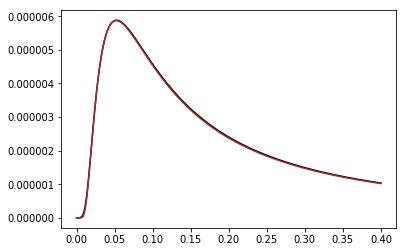

In [12]:
def func_Bohm_Ec(t, E, A_2, A_1):
    return (A_1/(E**3*t)**(3/2)*np.exp(-A_2/(E*t)))

# time intervall of interest in arbitrary units
t = np.linspace(0.0,0.4,10000)
# number of particles at each time defined in t
y_values = np.array(np.zeros(10000))
# k is the ratio of E_max/E_min
k = 1000
# sum all individual lightcurves for a spectrume in the range E - k*E
for a in range(1,k):
    y_values = y_values + np.abs((a*E)**(-alpha)*np.array(func_Bohm_Ec(t, E*a, D, A)))
 
plt.plot(t,y_values,c='k')
E_eff = 1.02*E
# plot a ligthcurve with a effective Energy of all particles
plt.plot(t,func_Bohm_Ec(t, E_eff, D, A)/92.,c='brown')

$\textbf{Kolmogorov diffusion:} $ The diffusion coefficients energy and magnetic field scaling is given for weak turbulence levels $b \leq B$ as

\begin{align}
\kappa \propto \left(\frac{E}{B}\right)^{\alpha} \propto \left(r^{3\beta /2} \right)^{\alpha} \propto E^{3 \alpha}
\end{align}

with $\alpha \approx \frac{1}{3}$ for $b \ll B$.

\begin{align}
\frac{r^2}{\kappa}  \propto \frac{r^\beta}{r^{3\alpha \beta/2}} = r^{\beta - 3\alpha \beta/2} = r^{\beta/2} \propto E^{}.
\end{align}

Since this is a rather theoretical limit, a more realisitc value of $\alpha \approx \frac{2}{3}$ is used that corresponts to $b/B \approx 0.1$:

\begin{align}
\frac{r^2}{\kappa}  \propto \frac{r^\beta}{r^{3\alpha \beta/2}} = r^{\beta - 3\alpha \beta/2} = r^{0} \propto E^{0}.
\end{align}

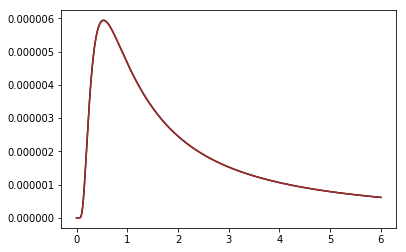

In [13]:
# for alpha = 2/3
def func_Kolmogorov_Ec(t, E, A_2, A_1):
    return (A/(t*E**2)**1.5*np.exp(-A_2/(t)))

# time intervall of interest in arbitrary units
t = np.linspace(0.0,6.,10000)
# number of particles at each time defined in t
y_values = np.array(np.zeros(10000))
# k is the ratio of E_max/E_min
k = 1000
# sum all individual lightcurves for a spectrume in the range E - k*E
for a in range(1,1000):
    y_values = y_values + np.abs((a*E)**(-alpha)*np.array(func_Kolmogorov_Ec(t, E*a, D, A)))
 
plt.plot(t,y_values,c='k')
E_eff = 1.02*E
# plot a ligthcurve with a effective Energy of all particles
plt.plot(t,func_Kolmogorov_Ec(t, E_eff, D, A)/91.,c='brown')

### 3.2.2 Emission at $R_0$ up to $E_\mathrm{\gamma,max}$

Electron with higher energies can also emit photons at radius $R_0$ with higher photon energies. However, since $E_\mathrm{\gamma,min}$ is constrained by the observation, only energies up to 
\begin{align}
E_\mathrm{e,max} = \frac{1}{40^{1/2}}\left(\frac{E_\mathrm{\gamma,max}}{\mathrm{keV}}\right)^{1/2} \left(\frac{B_\mathrm{max}}{\mathrm{G}}\right)^{-1/2}  \mathrm{GeV}
\end{align}
are considered.

$\textbf{Bohm diffusion:} $ The diffusion coefficients is given for strong turbulence levels $b \geq B$ as

\begin{align}
\kappa = \frac{E_\mathrm{e}}{6qb_\mathrm{eff}} \propto \frac{E_\mathrm{e}}{B_\mathrm{max}}
\end{align}

and therefore:

\begin{align}
\frac{r^2}{\kappa}  \propto \frac{R_0^2}{E_\mathrm{e}} B_\mathrm{max}
\end{align}

It yields: 

\begin{align}
N(t) = \frac{A_1}{(E_\mathrm{e} t)^{3/2}}\exp{\left(-\frac{R_0^2}{4\pi\,E_\mathrm{e} t}\right)}.
\end{align}

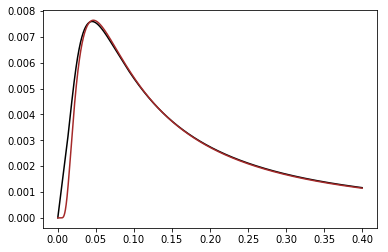

In [14]:
def func_Bohm_R0(t, E, A_2, A_1):
    return (A_1/(E*t)**(3/2)*np.exp(-A_2/(E*t)))

# time intervall of interest in arbitrary units
t = np.linspace(0.0,0.4,10000)
# number of particles at each time defined in t
y_values = np.array(np.zeros(10000))
# k is the ratio of E_max/E_min
k = 1000
# sum all individual lightcurves for a spectrume in the range E - k*E
for a in range(1,1000):
    y_values = y_values + np.abs((a*E)**(-alpha)*np.array(func_Bohm_R0(t, E*a, D, A)))
 
plt.plot(t,y_values,c='k')
E_eff = 1.14*E
# plot a ligthcurve with a effective Energy of all particles
plt.plot(t,func_Bohm_R0(t, E_eff, D, A)/75.,c='brown')

# 4. Summary of model

# 5. Observed data

In [375]:
def loadData(file_name):
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        line_count = 0
        x = []
        y = []
        for row in csv_reader:
            x.append(float(row[0]))
            y.append(1-10**(0.4*(-float(row[1]))))
            line_count += 1
    return (x,y)

def fit_flare(func, x, y, x_start, x_end, p0, color_fit):
    x_data = np.array(x[x_start:x_end])
    y_data = np.array(y[x_start:x_end])
    popt, pcov = curve_fit(func, x_data, y_data, p0)
    print(popt)
    x_plot = np.linspace(4000, x[-1], 10000)
    plt.plot(x_plot, func(x_plot, *popt), color = color_fit)
    D2_K = popt[1]**2/popt[0]
    return (D2_K, popt)

## Load data from Osten et al. paper (2016)  [0.3-10 keV] 

Text(0, 0.5, '$F$')

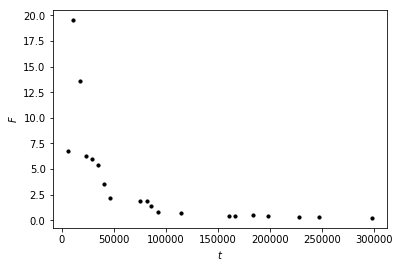

In [376]:
x = [5723,10887,17481,23037,29024,34904,40344,46551,7.531e+04,8.152e+04,8.615e+04,9.246e+04,1.1489e+05,
1.6108e+05,1.6645e+05,1.8395e+05,1.9811e+05,2.278e+05,2.4788e+05,2.9862e+05,3.8676e+05,4.7076e+05,
5.8e+05,6.097e+05,6.589e+05,7.788e+05,8.971e+05,9.915e+05,1.1014e+06,1.1985e+06,1.211e+06,
1.3246e+06,1.5363e+06,1.6717e+06]

y=[6.758,19.515,13.633,6.304,6.035,5.372,3.5526,2.2027,1.8499,1.8976,1.3829,0.8486,0.7429,0.43914,0.44671,
  0.573,0.41003,0.30272,0.33797,0.24746,0.23542,0.42921,0.14965,0.11049,0.11494,0.08791,0.07383,0.25689,
  0.09415,0.17931,0.10063,0.07569,0.07777,0.07809]

plt.scatter(x[0:20], y[0:20], label='data',color = 'k',s=10)
plt.xlabel('$t$')
plt.ylabel('$F$')

Fit the data with the analytical lightcurve

[ 1.18679225e-02  1.46456811e+01 -4.03949858e+03]
D2_K:  5422077256346.46
k:  4.149701108309383e+25  cm^2/s


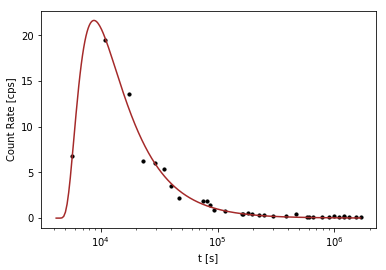

In [377]:
plt.scatter(x, y, label='data',color = 'k',s=10)

p0 = (1.18679226e-02,  1.46456808e+01, -4.03949861e+03)
D2_K_1, popt_1 = fit_flare(funcNew, x, y, 0, 30, p0, 'brown')
c = 3*10**8
print('D2_K: ',D2_K_1*c)
D = 5*10**8
print('k: ', D**2/D2_K_1*c*10**4, ' cm^2/s')
    
plt.xlabel('t [s]')
plt.ylabel('Count Rate [cps]')
plt.xscale('log')
#plt.yscale('log')
plt.savefig('TRAPPIST-1_1_construct.pdf')

Load the V-band data:

In [378]:
xV = [ 731.98, 747.75, 765.77, 779.28, 786.04, 795.05, 797.30, 804.05, 810.81, 817.57, 817.57, 824.32, 831.08, 835.59,
837.84, 849.10, 855.86, 860.36, 873.87, 880.63, 885.14, 891.89, 903.15, 912.16, 918.92, 934.68, 939.19, 945.95, 952.70,
963.96, 970.72, 977.48, 979.73, 990.99, 997.75, 1002.25, 1011.26, 1018.02, 1031.53, 1029.28, 1033.78, 1038.29, 1042.79,
1054.05, 1054.05, 1056.31, 1058.56,1063.06,1069.82,1076.58,1083.33,1090.09,1096.85,1164.41,1164.41,1166.67,1200.45,1207.21,
1220.72,1234.23,1243.24,1247.75,1256.76,1263.51,1265.77,1270.27,1274.78,1279.28,1286.04,1288.29,1299.55,1315.32,1324.32,
1333.33,1344.60,1351.35,1364.87,1376.13,1385.14,1389.64,1398.65,1409.91,1423.42,1441.44,1457.21,1472.97,1488.74,1495.50,
1502.25,1513.51,1524.78,1536.04,1554.05,1567.57,1585.59,1610.36,1630.63,1650.90,1677.93,1691.44,1716.22,1740.99,
1777.03,1804.05,1822.07,1842.34,1862.61,1878.38,1891.89,1905.41,1930.18,1952.70]
yV = [0.04873786,0.04951456,0.05184466,0.05572816,0.06194175,0.07048544,0.07592233,0.08912621,0.09922330,0.1062136,
0.1132039,0.1264078,0.1574757,0.1885437,0.2211650,0.2429126,0.2460194,0.2405825,0.2266019,0.2033010,0.2467961,0.2273786,
0.2817476,0.2421359,0.2615534,0.2910680,0.3174757,0.3400000,0.3469903,0.3563107,0.3710680,0.3415534,0.3361165,0.3400000,
0.3392233,0.3376699,0.3337864,0.3299029,0.3198058,0.3174757,0.3120388,0.3042718,0.3003883,0.2864078,0.2825243,
0.2809709,0.2778641,0.2716505,0.2646602,0.2576699,0.2506796,0.2444660,0.2398058,0.1590291,0.1489320,0.1434951,0.1357282,
0.1279612,0.1365049,0.1450485,0.1605825,0.1528155,0.1481553,0.1427184,0.1372816,0.1310680,0.1271845,0.1240777,
0.1225243,0.1217476,0.1201942,0.1186408,0.1186408,0.1155340,0.1124272,0.1108738,0.1108738,0.1139806,0.1155340,
0.1124272,0.1085437,0.1046602,0.1015534,0.09844660,0.09533981,0.09611650,0.09456311,0.09067961,0.08601942,0.08058252,
0.07592233,0.07126214,0.06660194,0.06271845,0.05883495,0.05339806,0.05184466,0.04796117,0.04640777,0.04563107,
0.04097087,0.03786408,0.03553398,0.03553398,0.03320388,0.02932039,0.02543689,0.02388350,0.02310680,0.02077670,
0.02000000,0.01766990]
xV = 10*np.array(xV)

Text(0, 0.5, '$F$')

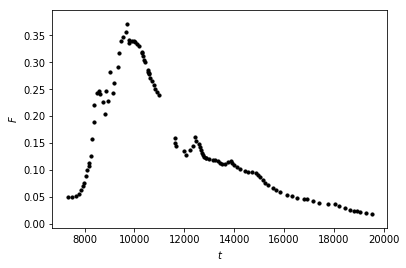

In [379]:
plt.scatter(xV, yV, label='data',color = 'k',s=10)
plt.xlabel('$t$')
plt.ylabel('$F$')

[ 1.13171479e+00  1.09069498e+04 -8.81202407e+05]
D2_K:  3.1534858703848748e+16
k:  7.134961412480955e+21  cm^2/s


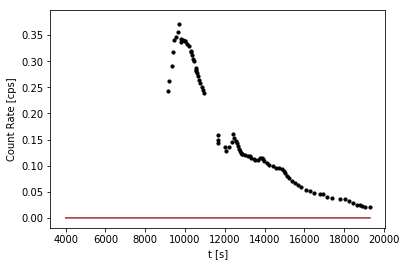

In [380]:
s = 23
m=-1
plt.scatter(xV[s:m], yV[s:m], label='data',color = 'k',s=10)
### first flare ###
p0 = (0.01,  100., -10000)
D2_K_1, popt_1 = fit_flare(func, xV[s:m], yV[s:m], 0, -1, p0, 'brown')
c = 3*10**8
print('D2_K: ',D2_K_1*c)
D = 5*10**8
print('k: ', D**2/D2_K_1*c*10**4, ' cm^2/s')
    
plt.xlabel('t [s]')
plt.ylabel('Count Rate [cps]')
#plt.xscale('log')
#plt.yscale('log')
plt.savefig('V_band.pdf')

Load the R-band data:

In [381]:
xR=[815.3153,826.5766,837.8378,846.8468,853.6036,860.3604,873.8739,885.1351,898.6486,903.1532,912.1622,923.4234,
927.9279,934.6847,939.1892,945.9459,957.2072,957.2072,968.4685,972.9730,984.2342,995.4955,1000.000,1011.261,
1013.514,1024.775,1033.784,1038.288,1047.297,1054.054,1056.306,1060.811,1078.829,1087.838,1096.847,1105.856,
1112.613,1121.622,1130.631,1139.640,1150.901,1162.162,1171.171,1180.180,1193.694,1209.459,1222.973,1231.982,
1245.495,1259.009,1270.270,1286.036,1306.306,1324.324,1342.342,1360.360,1378.378,1394.144,1407.658,1418.919,
1439.189,1457.207,1479.730,1497.748,1504.505,1515.766,1529.279,1538.288,1549.550,1563.063,1576.577,1601.351,
1617.117,1632.883,1646.396,1657.658,1668.919,1691.441,1704.955,1718.468,1734.234,1756.757,1772.523,1788.288,
1806.306,1824.324,1837.838,1858.108,1869.369,1887.387,1903.153,1918.919,1934.685,1954.955,1972.973,1981.982]
yR=[0.1116505,0.1341748,0.1753398,0.2071845,0.2118447,0.2064078,0.2172816,0.1994175,0.2017476,0.2056311,0.2188350,
0.2343689,0.2405825,0.2607767,0.2848544,0.3050485,0.3066019,0.3205825,0.3174757,0.3089320,0.3058252,0.3034951,
0.2965049,0.3019417,0.2957282,0.2926214,0.2871845,0.2817476,0.2732039,0.2662136,0.2561165,0.2467961,0.2390291,
0.2312621,0.2234951,0.2172816,0.2095146,0.2025243,0.1970874,0.1885437,0.1807767,0.1722330,0.1660194,0.1566990,
0.1504854,0.1489320,0.1419417,0.1497087,0.1551456,0.1481553,0.1434951,0.1372816,0.1310680,0.1310680,0.1264078,
0.1225243,0.1248544,0.1186408,0.1163107,0.1139806,0.1100971,0.1062136,0.1054369,0.1007767,0.09456311,0.08990291,
0.08601942,0.08291262,0.07747573,0.07359223,0.06970874,0.06582524,0.06349515,0.06271845,0.06194175,0.06116505,
0.05961165,0.05805825,0.05572816,0.05262136,0.05029126,0.04796117,0.04796117,0.04796117,0.04640777,0.04330097,
0.04097087,0.03786408,0.03475728,0.03242718,0.02932039,0.02776699,0.02543689,0.02310680,0.02233010,0.02155340]
xR = 10*np.array(xR)

[ 5.37695532e-03 -6.55842770e+01  3.26819244e-02]
D2_K:  239985110515381.34
k:  9.375581656578612e+23  cm^2/s


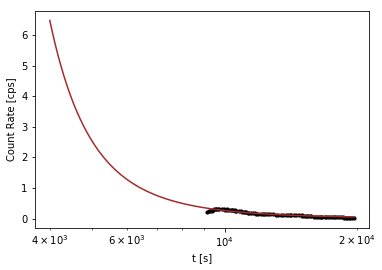

In [382]:
s = 10
m= -1
plt.scatter(xR[s:m], yR[s:m], label='data',color = 'k',s=10)
### first flare ###
p0 = (0.01,0.2,0.1)
D2_K_1, popt_1 = fit_flare(func, xR[s:m], yR[s:m], 0, -1, p0, 'brown')
c = 3*10**8
print('D2_K: ',D2_K_1*c)
D = 5*10**8
print('k: ', D**2/D2_K_1*c*10**4, ' cm^2/s')
    
plt.xlabel('t [s]')
plt.ylabel('Count Rate [cps]')
plt.xscale('log')
#plt.yscale('log')
plt.savefig('R_band.pdf')